In [2]:
# author: Shaoying Tang

from bs4 import BeautifulSoup
import requests
import re
from string import Template

In [3]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, ' ', raw_html)
  return cleantext 

def get_lyrics(singer,song):
    result = requests.get('http://lyrics.wikia.com/{0}:{1}'.format(singer,song))
    soup  = BeautifulSoup(result.content)
    lyrics = soup.find("div",{'class':'lyricbox'})
    return cleanhtml(str(lyrics))

In [4]:
import os
os.chdir('E:\\Lyrics of 50 bands')
import pandas as pd

hr1 = pd.read_csv('hard rock 1.csv')
hr2 = pd.read_csv('hard rock 2.csv')

In [177]:
singers_60 = ['Bob Dylan','The Beatles','The Beach Boys','The Supremes','The Kinks','The Animals','Cream',
              'The Rolling Stones','The Doors','Elvis Presley']#10
singers_70 = ['Led Zeppelin','Pink Floyd','The Carpenters','Eagles','Elton John',
              'Queen','The Who','Fleetwood Mac','Chicago','Deep Purple']#10
singers_80 = ['Guns N Roses','ACDC','Poison','U2','Def Leppard',
              'Van Halen','Journey','Bon Jovi','Prince','Scorpions']#10
singers_90 = ['Nirvana','Pearl Jam','R.E.M','Weezer','Metallica',
              'Red Hot Chili Peppers','Sonic Youth','Nine Inch Nails','The Smashing Pumpkins','Oasis'] #10
singers_00 = ['Radiohead','The White Stripes','Coldplay','Nickelback','Linkin Park',
             'Three Days Grace','My Chemical Romance','Breaking Benjamin','Muse','Avenged Sevenfold'] #10

singers = singers_60 + singers_70 + singers_80 + singers_90 + singers_00

In [44]:
hr1['Singer'] = [i.strip() for i in hr1['Singer']]
hr1['Song'] = [i.strip() for i in hr1['Song']]

to_drop = []
for i in range(hr1.shape[0]):
    if hr1['Singer'][i] in singers:
        to_drop.append(i)

hr1 = hr1.drop(to_drop)
hr1.index = range(len(hr1))

hr2['Singer'] = [i.strip() for i in hr2['Singer']]
hr2['Song'] = [i.strip() for i in hr2['Song']]

to_drop = []
for i in range(hr2.shape[0]):
    if hr2['Singer'][i] in singers or hr2['Song'][i] in hr1['Song']:
        to_drop.append(i)

hr2 = hr2.drop(to_drop)
hr2.index = range(len(hr2))

,Singer,Song
0,Sammy Hagar,I Can’t Drive 55
1,Grand Funk Railroad,We’re An American Bandv
2,Buckcherry,Lit Up
3,The Edgar Winter Group,Frankenstein
4,Kansas,Carry On Wayward Son


In [50]:
hr1['Lyrics'] = [get_lyrics(hr1['Singer'][i],hr1['Song'][i]) for i in range(hr1.shape[0])]

to_drop = []
for i in range(hr1.shape[0]):
    if hr1['Lyrics'][i] == 'None' and len(hr1['Lyrics'][i].split()) < 20 :
        to_drop.append(i)

hr1 = hr1.drop(to_drop)
hr1.index = range(len(hr1))
hr1.head()

,Singer,Song,Lyrics
0,Sammy Hagar,I Can’t Drive 55,None
1,Grand Funk Railroad,We’re An American Bandv,None
2,Buckcherry,Lit Up,Oh yeah You wanna find it C'mon yeah I'm on ...
3,The Edgar Winter Group,Frankenstein,Instrumental \n
4,Kansas,Carry On Wayward Son,Carry on my wayward son There'll be peace whe...


In [57]:
hr2['Lyrics'] = [get_lyrics(hr2['Singer'][i],hr2['Song'][i]) for i in range(hr2.shape[0])]

to_drop = []
for i in range(hr2.shape[0]):
    if hr2['Lyrics'][i] == 'None' and len(hr2['Lyrics'][i].split()) < 20:
        to_drop.append(i)

hr2 = hr2.drop(to_drop)
hr2.index = range(len(hr2))
hr2.head()

,Song,Singer,Lyrics
0,American Woman,The Guess Who,American woman gonna mess your mind American ...
1,Aqualung,Jethro Tull,Sitting on the park bench Eyeing little girls...
2,Bad to the Bone,George Thorogood,Now on the day I was born The nurses all gath...
3,Barracuda,Heart,So this ain't the end I saw you again Today I...
4,Basket Case,Green Day,Do you have the time to listen to me whine Ab...


In [58]:
hr = pd.concat([hr1,hr2])
hr.shape

(134, 3)

In [59]:
import os
os.chdir('E:\\Lyrics of 50 bands')
import pandas as pd

sr1 = pd.read_csv('soft rock 1.csv')
sr1.head()

,Song,Singer
0,Have You Ever Really Loved A Woman?,Bryan Adams
1,All Out of Love,Air Supply
2,New Kid In Town,Eagles
3,Lost in Love,Air Supply
4,Biggest Part of Me,Ambrosia


In [61]:
sr1['Singer'] = [i.strip() for i in sr1['Singer']]
sr1['Song'] = [i.strip() for i in sr1['Song']]

to_drop = []
for i in range(sr1.shape[0]):
    if sr1['Singer'][i] in singers:
        to_drop.append(i)

sr1 = sr1.drop(to_drop)
sr1.index = range(len(sr1))

sr1.head()

,Song,Singer
0,Have You Ever Really Loved A Woman?,Bryan Adams
1,All Out of Love,Air Supply
2,Lost in Love,Air Supply
3,Biggest Part of Me,Ambrosia
4,Time,The Alan Parsons Project


In [88]:
sr1['Lyrics'] = ['None']*len(sr1)
for i in range(len(sr1)):
    sr1['Lyrics'][i] = get_lyrics(sr1['Singer'][i],sr1['Song'][i]) 

to_drop = []
for i in range(sr1.shape[0]):
    if sr1['Lyrics'][i] == 'None' and len(sr1['Lyrics'][i].split()) < 20 :
        to_drop.append(i)

sr1 = sr1.drop(to_drop)
sr1.index = range(len(sr1))
sr1.head()

,Song,Singer,Lyrics
0,Have You Ever Really Loved A Woman?,Bryan Adams,To really love a woman To understand her - Yo...
1,All Out of Love,Air Supply,I’m lying alone with my head on the phone Thi...
2,Lost in Love,Air Supply,I realize the best part of love is the thinne...
3,Biggest Part of Me,Ambrosia,Yeah (Sunrise) There's a new sun a-risin' ...
4,Time,The Alan Parsons Project,"Time, flowing like a river Time, beckoning me..."


In [89]:
sr1.shape

(128, 3)

In [91]:
hr['Genre'] = ['hard']*len(hr)
sr1['Genre'] = ['soft']*len(sr1)

In [92]:
df = pd.concat([hr,sr1])

In [96]:
df.index = range(len(df))
df.tail()

,Genre,Lyrics,Singer,Song
257,soft,"If only you believe like I believe, baby (If ...",Jefferson Starship,Miracles
258,soft,"I got the call today, I didn't wanna hear But...",Don Henley,The Heart of the Matter
259,soft,I'm tired of playing on the team It seems I d...,Hall & Oates,One on One
260,soft,Born in the valley And raised in the trees Of...,Dan Fogelberg,Run For the Roses
261,soft,"Spending all my nights, all my money going ou...",Player,Baby Come Back


In [102]:
df.to_csv('hs_train.csv')

In [99]:
to_drop = []
for i in range(df.shape[0]):
    if len(df['Lyrics'][i].split()) < 20:
        to_drop.append(i)
df = df.drop(to_drop)
df.index = range(len(df))
df.head()

,Genre,Lyrics,Singer,Song
0,hard,Oh yeah You wanna find it C'mon yeah I'm on ...,Buckcherry,Lit Up
1,hard,Carry on my wayward son There'll be peace whe...,Kansas,Carry On Wayward Son
2,hard,When dreaming I'm guided to another world Tim...,Creed,Higher
3,hard,Can't explain all the feelings that you're ma...,The Darkness,I Believe In A Thing Called Love
4,hard,"Turn it up Ooh! Yeah! I'm working hard, you...",Autograph,Turn Up The Radio


In [101]:
df.shape

(260, 4)

In [110]:
# load train
train  = [tuple([df['Lyrics'][i].decode("utf8"),df['Genre'][i]]) for i in range(len(df))]

In [108]:
from textblob.classifiers import NaiveBayesClassifier

In [111]:
cl = NaiveBayesClassifier(train)

In [113]:
hs2 = pd.read_csv('hs_test.csv')
hs2.head()

,Singer,Song,Genre
0,Thin Lizzy,The Boys are Back in Town,hard
1,Mountain,Mississippi Queen,hard
2,Blind Melon,No Rain,hard
3,Steppenwolf,Magic Carpet Ride,hard
4,Soundgarden,Spoonman,hard


In [115]:
hs2['Lyrics'] = ['None']*len(hs2)
for i in range(len(hs2)):
    hs2['Lyrics'][i] = get_lyrics(hs2['Singer'][i],hs2['Song'][i]).decode("utf8") 

In [122]:
to_drop = []
for i in range(len(hs2)):
    if hs2['Lyrics'][i] == 'None' and len(hs2['Lyrics'][i].split()) < 20 and (hs2['Singer'][i] not in df['Singer'] or hs2['Song'] not in df['Song']) :
        to_drop.append(i)

hs2 = hs2.drop(to_drop)
hs2.index = range(len(hs2))
hs2.head()

,Singer,Song,Genre,Lyrics
0,Thin Lizzy,The Boys are Back in Town,hard,Guess who just got back today Them wild-eyed ...
1,Mountain,Mississippi Queen,hard,"Mississippi Queen, if you know what I mean Mi..."
2,Blind Melon,No Rain,hard,"Ooh, hoo hoo hoo Hoo hoo hoo All I can say i..."
3,Steppenwolf,Magic Carpet Ride,hard,"I like to dream Yes, yes, right between my so..."
4,Soundgarden,Spoonman,hard,Oh Mmm Feel the rhythm with your hands ( Ste...


In [121]:
test  = [tuple([hs2['Lyrics'][i],hs2['Genre'][i]]) for i in range(len(hs2))]

In [125]:
results = []
for lyric in hs2['Lyrics']:
    results.append(cl.classify(lyric))

In [127]:
hs2['prediction'] = results

In [128]:
hs2

,Singer,Song,Genre,Lyrics,prediction
0,Thin Lizzy,The Boys are Back in Town,hard,Guess who just got back today Them wild-eyed ...,soft
1,Mountain,Mississippi Queen,hard,"Mississippi Queen, if you know what I mean Mi...",hard
2,Blind Melon,No Rain,hard,"Ooh, hoo hoo hoo Hoo hoo hoo All I can say i...",soft
3,Steppenwolf,Magic Carpet Ride,hard,"I like to dream Yes, yes, right between my so...",hard
4,Soundgarden,Spoonman,hard,Oh Mmm Feel the rhythm with your hands ( Ste...,hard
5,Rob Zombie,Dragula,hard,"""Superstition, fear, and jealousy."" Dead I a...",hard
6,Ted Nugent,Stranglehold,hard,"Here I come again now, baby Like a dog in hea...",hard
7,The Cult,She Sells Sanctuary,hard,Oh the heads that turn Make my back burn Oh t...,hard
8,Twisted Sister,I Wanna Rock,hard,I wanna rock (Rock) I wanna rock (Rock) I wan...,soft
9,Megadeth,Symphony of Destruction,hard,You take a mortal man And put him in control ...,hard


In [129]:
hs2.to_csv('test data and prediction results.csv')

In [141]:
from collections import Counter
Counter(hs2['Genre'])[list(Counter(hs2['Genre']))[0]]

46

In [144]:
from __future__ import division

In [223]:
# calculate confusion matrix, accuracy, precision, recall

def summary(obs, pred):
    type0 = list(Counter(obs))[0]
    type1 = list(Counter(obs))[1]
    count_o1p1,count_o0p0,count_o1p0,count_o0p1 = 0,0,0,0
    for i in range(len(obs)):
        if obs[i] == type0:
            if pred[i] == type0:
                count_o0p0 += 1
            else:
                count_o0p1 += 1
        else:
            if pred[i] == type1:
                count_o1p1 += 1
            else:
                count_o1p0 += 1
    print "observation "+str(list(Counter(obs))[0])+" "+str(list(Counter(obs))[1])
    print "prediction"
    print str(list(Counter(obs))[0])+"        "+str(count_o0p0)+"    "+str(count_o1p0)
    print str(list(Counter(obs))[1])+"        "+str(count_o0p1)+"    "+str(count_o1p1)
    print
    print "Accuracy: "+str((count_o0p0 + count_o1p1)/len(obs))
    print "Precision for "+str(list(Counter(obs))[0])+": "+str(count_o0p0/(count_o0p0 + count_o1p0))
    print "Recall for "+str(list(Counter(obs))[0])+": "+str(count_o0p0/(count_o0p0 + count_o0p1))

In [224]:
summary(hs2['Genre'],hs2['prediction'])

observation hard soft
prediction
hard        33    1
soft        13    28

Accuracy: 0.813333333333
Precision for hard: 0.970588235294
Recall for hard: 0.717391304348


In [179]:
import os
os.chdir('E:\\Lyrics of 50 bands\\lyrics by song')
files = []
for i in os.listdir("E:\\Lyrics of 50 bands\\lyrics by song"):
    if i.endswith('.txt'):
        files.append(open(i).read())
        names.append(i)

In [170]:
results = [cl.classify(f) for f in files]
Counter(results)

Counter({'hard': 859, 'soft': 1641})

In [181]:
count_hard = [0]*50
count_soft = [0]*50

for i in range(50):
    for j in range(2500):
        if singers[i] in names[j]:
            if results[j] == 'hard':
                count_hard[i] += 1
            else:
                count_soft[i] += 1

classified = pd.DataFrame({'artist':singers,'classified hard rock':count_hard,'classified soft rock':count_soft})

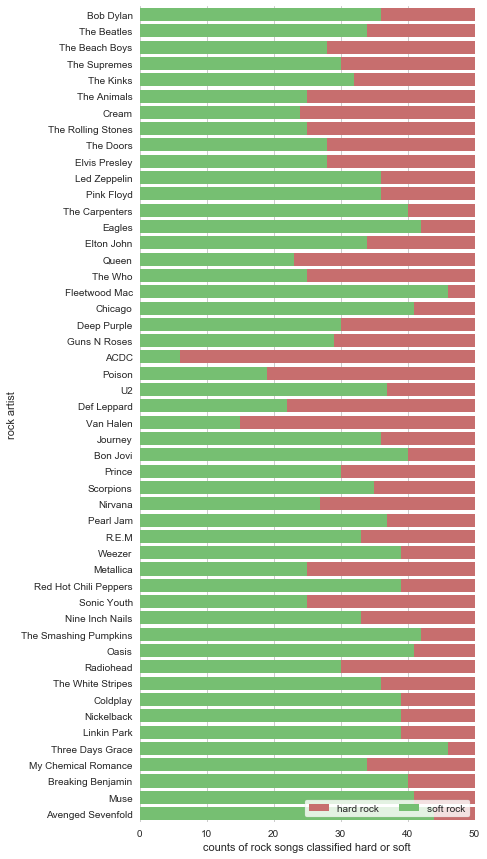

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.barplot(x=[50]*50, y='artist', data=classified,
            label="hard rock", color="r")

# Plot the crashes where alcohol was involved
sns.barplot(x='classified soft rock', y='artist', data=classified,
            label="soft rock", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 50), ylabel="rock artist",
       xlabel="counts of rock songs classified hard or soft")
sns.despine(left=True, bottom=True)

In [190]:
 from sklearn.datasets import fetch_20newsgroups

In [194]:
twenty_train.data[0]

u'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

In [195]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Lyrics'])

In [197]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [199]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)),])
svm_classifier= text_clf.fit(df['Lyrics'], df['Genre'])

In [201]:
predicted = text_clf.predict(hs2['Lyrics'])

In [203]:
import numpy as np
np.mean(predicted == hs2['Genre']) 

0.82666666666666666

In [222]:
summary(hs2['Genre'],predicted)

observation hard soft
prediction
hard        37    4
soft        9    25

Accuracy: 0.826666666667
Precision for hard: 0.90243902439
Recall for soft: 0.804347826087


In [204]:
from sklearn import metrics
print(metrics.classification_report(hs2['Genre'], predicted,target_names=['hard','soft']))

             precision    recall  f1-score   support

       hard       0.90      0.80      0.85        46
       soft       0.74      0.86      0.79        29

avg / total       0.84      0.83      0.83        75



In [227]:
print(metrics.classification_report(hs2['Genre'], hs2['prediction'],target_names=['hard','soft']))

             precision    recall  f1-score   support

       hard       0.97      0.72      0.82        46
       soft       0.68      0.97      0.80        29

avg / total       0.86      0.81      0.82        75



In [205]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, df['Genre'])

In [206]:
X_new_counts = count_vect.transform(hs2['Lyrics'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted_NB = clf.predict(X_new_tfidf)

In [208]:
np.mean(predicted_NB == hs2['Genre'])   

0.69333333333333336

In [210]:
hs2['Predicted_SVM'] = list(predicted)

In [219]:
results_svm = text_clf.predict(files) 

count_hard = [0]*50
count_soft = [0]*50

for i in range(50):
    for j in range(2500):
        if singers[i] in names[j]:
            if results_svm[j] == 'hard':
                count_hard[i] += 1
            else:
                count_soft[i] += 1

classified = pd.DataFrame({'artist':singers,'svm classified hard rock':count_hard,'svm classified soft rock':count_soft})

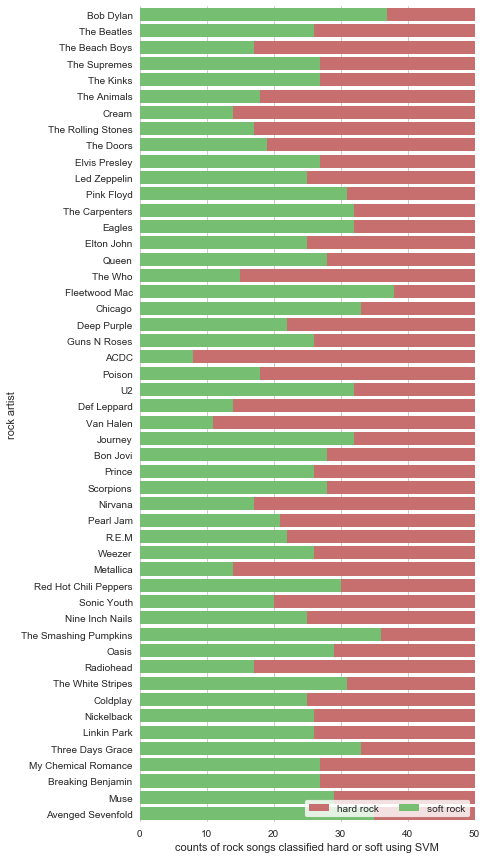

In [221]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.barplot(x=[50]*50, y='artist', data=classified,
            label="hard rock", color="r")

# Plot the crashes where alcohol was involved
sns.barplot(x='svm classified soft rock', y='artist', data=classified,
            label="soft rock", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 50), ylabel="rock artist",
       xlabel="counts of rock songs classified hard or soft using SVM" )
sns.despine(left=True, bottom=True)

In [294]:
tfidf = pd.read_csv('E:\\Lyrics of 50 bands\\output\\tfidf descending result.csv')

In [295]:
soft_sample = [df['Lyrics'][i].decode("utf8") for i in range(len(df)) if df['Genre'][i]=='soft']

In [311]:
hard_singers = [classified['artist'][i]
                for i in range(len(classified)) if classified['svm classified soft rock'][i] < 30 ] 

In [317]:
soft_singers = list(set(classified['artist']) - set(hard_singers))

In [323]:
import os
os.chdir('E:\\Lyrics of 50 bands\\Lyrics by rock artist')
files2 = []
names2 = []
for i in os.listdir("E:\\Lyrics of 50 bands\\Lyrics by rock artist"):
    if i.endswith('.txt'):
        files2.append(open(i).read())
        names2.append(i[:-4])

In [325]:
from textblob import TextBlob

hard_sentiment = [TextBlob(files2[i]).sentiment.polarity for i in range(50) if names2[i] in hard_singers]
soft_sentiment = [TextBlob(files2[i]).sentiment.polarity for i in range(50) if names2[i] in soft_singers]

In [327]:
from __future__ import division

hard_sentiment = sum(hard_sentiment)/len(hard_singers)
soft_sentiment = sum(soft_sentiment)/len(soft_singers)

In [336]:
df_senti = pd.DataFrame({"Genre":['hard rock','soft rock'],"Average Sentiment":[0.06322422035217948,0.17681712451951176]})

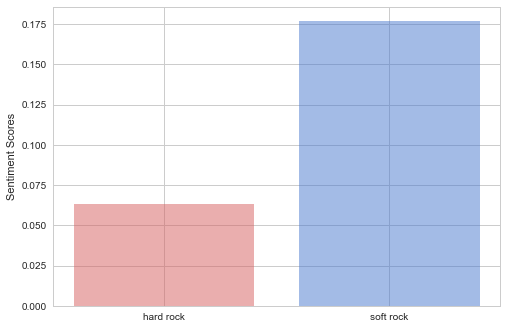

In [340]:
x_pos = np.arange(2)
plt.bar(x_pos, df_senti['Average Sentiment'], align='center', alpha=0.5,color=['r','b'])
plt.xticks(x_pos, df_senti['Genre'])
plt.ylabel('Sentiment Scores')
plt.show()

In [332]:
ll = [TextBlob(df['Lyrics'][i].decode('utf8')).sentiment.polarity for i in range(len(df)) if df['Genre'][i] == 'hard']

In [334]:
sum(ll)/len(ll)

0.06322422035217948

In [335]:
ln = [TextBlob(df['Lyrics'][i].decode('utf8')).sentiment.polarity for i in range(len(df)) if df['Genre'][i] == 'soft']
sum(ln)/len(ln)

0.17681712451951176